# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 22/01/2021

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos Modulação e desmodulação Digital.

Considere as funções já criadas em Python das aulas anteriores.

Construa uma função que simule a modulação digital 8-PSK.
Esta função recebe como parâmetro de entrada um array de bits e retorna um array, simulando o sinal analógico modulado a transmitir. Dado que o sinal modulado é simulado, é necessário que a função ainda receba como parâmetros de entrada o número de pontos por cada símbolo ($P=8$) e a energia média por bit ($E_b$). Admita que a frequência da portadora é tal que
cada simbolo contém um período da portadora.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
from scipy import ndimage

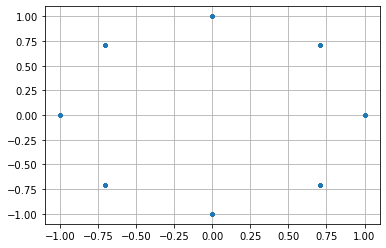

In [2]:
numero_simbolos = 1000

numeros_random = np.random.randint(0, 8, numero_simbolos) # 0 a 7
x_angulo = numeros_random*360/8.0 + 45 # 0, 45, 90, 135, 180, 225, 270, 315, 360 graus
x_radianos = x_angulo*np.pi/180.0 # sin() e cos() em radianos
oito_PSK = np.cos(x_radianos) + 1j*np.sin(x_radianos) # this produces our QPSK complex symbols
plt.plot(np.real(oito_PSK), np.imag(oito_PSK), '.')
plt.grid(True)
plt.show()

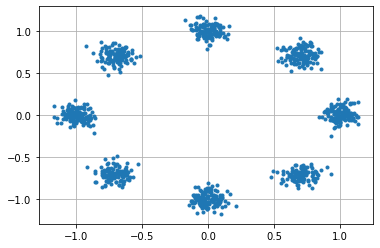

In [3]:
n = (np.random.randn(numero_simbolos) + 1j*np.random.randn(numero_simbolos))/np.sqrt(2) 
potencia = 0.01
r = oito_PSK + n * np.sqrt(potencia)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

In [4]:
def Codific(arr_signal_quantized,R):

    representation = []
    arr_signal_quantized = np.int_(arr_signal_quantized)

    for i in range(len(arr_signal_quantized)):
        if(arr_signal_quantized[i] < 0):
            valor_int = arr_signal_quantized[i] * -1
        else:
            valor_int = arr_signal_quantized[i]

        binary = bin(valor_int).replace("0b", "")
        representation.append(binary)

    arr_binary = []
    for y in range (len(representation)):
        binary_to_int = int(representation[y])

        for z in range (R):
            arr_binary.append(binary_to_int//pow(10,R-z - 1)%10)

    return arr_binary

def Descodific(arr_binary,R):
    #resposta
    posicao = 0
    arr_aux = []
    arr_final_aux = []

    for i in range(len(arr_binary)):
        conversao = str(arr_binary[i])
        arr_aux.append(conversao)

    for j in range(len(arr_binary)):
        if (j % R == 0):
            arr_final_aux.append(arr_aux[j])
        else:
            if (len(arr_final_aux[posicao]) == R):
                posicao = posicao + 1
            arr_final_aux[posicao] += arr_aux[i]

    arr_descodificado = []
    for z in range(len(arr_final_aux)):
        binario  = arr_final_aux[z]
        inteiro = int(binario, 2)
        arr_descodificado.append(inteiro)

    return arr_descodificado 

In [5]:
#resposta
def modPSK(array, P, Eb):
    
    constelacao = []
    angulo = 360/P
    
    for i in range(0, 5):
        if ((len(array) % 3) != 0):
            array.pop()
    
    n = 0
    Tb = 1/len(array)
    A = math.sqrt(Eb * Tb)
    
    for j in range(0, (int(len(array)/3))):
        
        pri  = str(array[n])
        seg  = str(array[n + 1])
        ter  = str(array[n + 2])
        final  = pri  + seg  + ter 
        
        x = int(final , 2)
        
        angulo_final = angulo  * x
        
        I = A*np.cos(math.radians(angulo_final/P*2*np.pi))
        Q = A* np.sin(math.radians(angulo_final/P*2*np.pi))
        
        Im = I + 1j * Q
        constelacao.append(Im)
        
        n = n + 3
        
    return constelacao

In [6]:
array = [0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1]
P = 8
Eb = 4

array_mpdici = modPSK(array, P, Eb)

print(array_mpdici)

[(0.408248290463863+0j), (0.3330099747611854+0.23615889434069876j), (0.13502719105471309+0.3852717538861896j), (-0.11272539532491718+0.39237692581943173j), (-0.31892841944414657+0.25485550795995204j), (-0.4075773096247859+0.023396652446195574j), (-0.34599688587514665-0.21668599777412334j), (-0.1568851360198225-0.37690014693909113j)]


In [7]:
def MPSK(array_complexos,P,Eb):
    ang = 360 / P
    Tb = 1/(len(array_complexos) * 3)
    A = math.sqrt(Eb * Tb)
    resultados = []
    for i in range(len(array_complexos)):
        
        R = array_complexos[i].real
        I = array_complexos[i].imag
        
        x = R/A
        y = I/A
        
        if x > 1:
            while(x>1):
                x = x - 0.1
                
        if x < -1:
            while(x<-1):
                x = x + 0.1
                
        if y > 1:
            while(y>1):
                y = y - 0.1
                
        if y < -1:
            while(y<-1):
                y = y + 0.1      

        if I >= 0:
            integer = round((math.degrees(math.acos(x) / np.pi / 2 * P)) /ang)
            
        else:
            sin = math.degrees(math.asin(y))
            integer = round(((180 - sin) * P / 2 / np.pi) / ang) 
            
        r = bin(integer).replace("0b", "")
        while len(r) != 3:
            r = "0" + r 
        for i in range(len(r)):
            resultados.append(int(r[i]))
        


        
    return resultados

print(MPSK(array_mpdici,P,Eb))

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]


Text(0, 0.5, '|Y(freq)|')

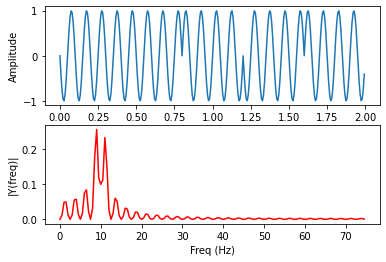

In [8]:
m=0.2
freq=10
freqs=2

Fs = 150.0;  # frequencia amostragem
Ts = 1.0/Fs; # periodo amostragem

t = np.arange(0,2,Ts)

bit_arr = np.array([180,180,0,180,0])
amostras_per_bit = 2*Fs/bit_arr.size 
dd = np.repeat(bit_arr, amostras_per_bit) #repete x y vezes
y= np.sin(2 * np.pi * (freq) * t+(np.pi*dd/180))


n = len(y) # tamanho do sinal
k = np.arange(n)
T = n/Fs
frq = k/T # frequency range de dois lado
frq = frq[range(n//2)] # frequency range dum lado
Y = np.fft.fft(y)/n # fft computing e normalization
Y = Y[range(n//2)]

fig, myplot = plt.subplots(2, 1)
myplot[0].plot(t,y)
myplot[0].set_xlabel('Tempo')
myplot[0].set_ylabel('Amplitude')

myplot[1].plot(frq,abs(Y),'r') # plotting do espectro
myplot[1].set_xlabel('Freq (Hz)')
myplot[1].set_ylabel('|Y(freq)|')

Construa uma função que simule, no receptor, um filtro adaptado (desmodulação).
Este deve receber um array com o sinal QPSK com ruído e deve retornar um array com a sequência binária correspondente.


Construa uma função que simule um canal AWGN.
Esta função recebe o sinal modulado, adiciona ruído (com uma determinada potência $\sigma_n$)
e devolve o sinal com ruído num array.
A função deve ter como parâmetro de entrada a potência do ruído a adicionar

In [9]:
#resposta

def canalAWGN(sinal, potencia):

    comprimento = len(sinal)
    array = []
    x = np.random.uniform(low=0.0, high=1.0, size=(comprimento,))
    y = np.random.uniform(low=0.0, high=1.0, size=(comprimento,))

    # AWGN com unity power
    n = (x + 1j*y)/np.sqrt(2)
    sinal_ruido = sinal + n * np.sqrt(potencia)

    return sinal_ruido

#sinal_out = sinal_in + sqrt(pot_noise) * randn( 1, len(sinal_in) )


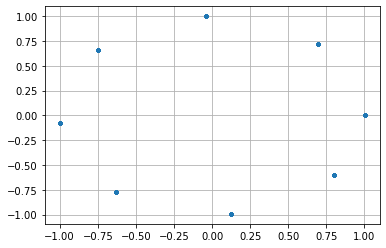

In [10]:
#resposta
import random

arr_bits = []
nbits = 50
for i in range (1000):
    n = random.randint(0,1)
    arr_bits.append(n)
    


PSK = modPSK(arr_bits,7,1000)
plt.plot(np.real(PSK), np.imag(PSK), '.')
plt.grid(True)
plt.show()

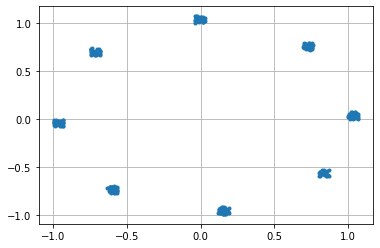

In [11]:
r = canalAWGN(PSK,0.01)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

Construa uma função que calcule o BER teórico para a modulação implementada.

In [12]:
#O BER teórico refere-se a expressão teórica que se encontra no formulário
def BER_teorico(Eb, P, No):
    # resposta
    
    k = 3
    BER_t = (1/k)*math.erfc(np.sqrt(k*(np.sin(np.pi/P)**2)*(Eb/(2*No))))
    return BER_t


No = 10e-3
print(BER_teorico(5, 8, No))

3.55846522415276e-50


Avalie todo o sistema de emissão e receção. Para isso deve medir experimentalmente e comparar, sempre que possível, com os valores teóricos, os seguintes índices:

    A SNR no canal e SNR na recepção;
    
    BER antes e depois da correcção de erros;
    
    Apresente a constelação antes e depois do sinal passar pelo canal.

Para o efeito deve atribuir diferentes valores aos parâmetros do sistema e avalia-lo com e sem o modulo de correcção de erros.

Deve considerar que o sinal de entrada é a imagem fornecida no moodle, tendo em conta que é necessário transmitir um "Header" inicial com a informação necessária para o receptor construir a imagem.

In [13]:
def Hamming_7_4(arr_bits):
    
    for i in range(5):
        if ((len(arr_bits) % 4) != 0):
            arr_bits.pop()
    
    
    duracao_final = int(len(arr_bits) * 7 / 4)
    
    
    array_bits_final = [0] * duracao_final
    
    iteracoes = int(len(arr_bits) / 4)
    
    
    index = 0
    index_final = 0
    
    for i in range(iteracoes):
       
       
        arr = []
        m1 = arr_bits[index]
        m2 = arr_bits[index + 1]
        m3 = arr_bits[index + 2]
        m4 = arr_bits[index + 3]

        x1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        x2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        x3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)

        arr = [m1,m2,m3,x3,m4,x2,x1]
        
        for j in range(7):
            
          
            
            array_bits_final[index_final+ j] = arr[j]
            
        index = index + 4
        
        index_final = index_final + 7
        
        
    return array_bits_final


def Detetor(arr_binary):
    
    duracao_final = int(len(arr_binary) / 7 * 4)
      
    array_bits_final = [0] * duracao_final
    
    iteracoes = int(len(arr_binary) / 7)
    
    index = 0
    index_aux = 0
    for i in range(iteracoes):
        arr = []
        m4 = arr_binary[index + 4]
        m3 = arr_binary[index + 2]
        m2 = arr_binary[index + 1]
        x3 = arr_binary[index + 3]
        m1 = arr_binary[index]
        x2 = arr_binary[index + 5]
        x1 = arr_binary[index + 6]
        p1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        p2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        p3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)
        b1 = str((x1 + p1) % 2)
        b2 = str((x2 + p2) % 2)
        b3 = str((x3 + p3) % 2) 
        
        if( b1 == b2 == b3):  

            arr = [m1,m2,m3,m4]
        else: 

            arr = [m1,m2,m3,x3,m4,x2,x1]
            erro = b3 + b2 + b1
            erro_index = 7 - int(erro, 2) 
            
            #print(erro_index)
            
            if(arr[erro_index]==1):
                
                arr[erro_index] = 0
            elif(arr[erro_index] == 0):
                arr[erro_index] = 1
                
            arr = [arr[0],arr[1],arr[2],arr[4]]
            
        for i in range(4):
            array_bits_final[index_aux] = arr[i]
            index_aux = index_aux + 1
        index = index + 7
        
        
    return array_bits_final

In [14]:
class Codificador:
    def __init__(self):
        '''
        codificar
        '''
        
    def codificar(self, array, R):
        array_copy = np.array(array, dtype=int)
        bit_array = np.zeros(int(len(array) * R))
        #start_time = time.time()

        c = 0;
        f = '{0:0'+str(R)+'b}'
        for i in array_copy:
            binary_rep = f.format(i)
            bit_array[c:c+R] = list(binary_rep)
            c+=R

        #print("--- codificar  %s  segundos ---" % (time.time() - start_time))

        return np.array(bit_array)

    def descodificar(self, array, R):
        int_array = np.zeros(math.ceil(len(array)/R), dtype=int)
        array = np.array(array, dtype=int)

        #start_time = time.time()
        z = 0
        for i in range(0, len(array), R):
            c =  "".join(map(str,array[i:i+R]))
            int_array[z] = int(c, 2)
            z += 1

        #print("--- descodificar 2  %s  segundos ---" %  (time.time() - start_time))
        return int_array 

    def Codific(self, arr_signal_quantized,R):

        representation = []
        arr_signal_quantized = np.int_(arr_signal_quantized)

        for i in range(len(arr_signal_quantized)):
            if(arr_signal_quantized[i] < 0):
                valor_int = arr_signal_quantized[i] * -1
            else:
                valor_int = arr_signal_quantized[i]

            binary = bin(valor_int).replace("0b", "")
            representation.append(binary)

        arr_binary = []
        for y in range (len(representation)):
            binary_to_int = int(representation[y])

            for z in range (R):
                arr_binary.append(binary_to_int//pow(10,R-z - 1)%10)

        return arr_binary

    def Descodific(self,arr_binary,R):
        #resposta


        while(len(arr_binary) % R != 0):
            arr_binary.append(0)

        numeros = int(len(arr_binary) / R)

        arr_str = []
        index = 0;
        #print("arr_binary")
        #print(arr_binary)

        for i in range(len(arr_binary)):
            bit_str = str(arr_binary[i])                   
            arr_str.append(bit_str)
        #print("arr_str")
        #print(arr_str)
        arr_juntos= []


        for i in range(len(arr_binary)):
            if(i % R == 0):
                for j in range(R):
                    if j==0:
                        bit = arr_str[i]
                    else:
                        bit = bit + arr_str[i + j]
                arr_juntos.append(bit)
                i = i + R

        #print("arr_juntos")
        #print(arr_juntos)

        index = 0
        arr_signal = []


        for j in range(len(arr_juntos)):
            binary = arr_juntos[j]
            integer = int(binary, 2)
            arr_signal.append(integer)            
        return arr_signal

def testar_codificador():
    R = 8
    codificador = Codificador()
    array = np.random.randint(0, 254, 2**18)  # 50331648
    array_bits = codificador.Codific(array, R)
    array_bit_to_int = codificador.Descodific(array_bits, R)


testar_codificador()

In [15]:
import numpy as np

class AWGNChannel:
    def __init__(self, BER=0):
        '''Construtor'''
    
    def canalAWGN(self,sinal, potencia):
        
        comprimento = len(sinal)
        array = []
        x = np.random.uniform(low=0.0, high=1.0, size=(comprimento,))
        y = np.random.uniform(low=0.0, high=1.0, size=(comprimento,))
        
        # AWGN com unity power
        n = (x + 1j*y)/np.sqrt(2)
        sinal_ruido = sinal + n * np.sqrt(potencia)

        return sinal_ruido


ruido = 10**-1
sinal_entrada = [0, 1, 1, 0, 1, 1, 0, 0]
canal = AWGNChannel()
print(canal.canalAWGN(sinal_entrada, 2*10))

[0.0429081 +0.33083485j 1.26737954+3.01793946j 3.93707733+2.24315881j
 0.13260699+0.99666772j 3.61956739+2.63386859j 2.2198535 +0.36074001j
 0.14099527+2.93606038j 2.68809637+0.18269763j]


In [16]:
import numpy as np

class PSKModulador:
    def __init__(self):
        self.P = 8

        ''' Construtor '''

    def MPSK(self, array_bits,P,Eb):

        #sinal modulado
        array = []

        '''certificar me que o tamanho do array e multiplo de 3
        pois as iteracoes vao ser feitas de 3 em 3 bits'''
        for i in range(5):
            if ((len(array_bits) % 3) != 0):
                array_bits.pop()

        '''modulacao em 8 fases, i.e, P= 8 e 360/8 = 45
           logo angulo entre estado das fases e 45º'''
        ang = 360 / P

        #periodo de bit 
        Tb = 1/len(array_bits)
        #calculo da amplitude do sinal
        A = math.sqrt(Eb * Tb)

        i = 0

        '''de 3 em 3 bits, ve se o numero inteiro correspondente
           aos 3 bits e multiplica se o numero inteiro por 45º 
           e com o resultado dessa multiplicacao obtem o angulo
           com o qual depois se faz o calculo do numero imaginario'''
        for j in range(int(len(array_bits)/3) ):

            bit1 = str(array_bits[i])
            bit2 = str(array_bits[i + 1])
            bit3 = str(array_bits[i + 2])
            bit = bit1 + bit2 + bit3

            #passar o bit de string a numero inteiro base binaria
            n = int(bit, 2)

            ang_bit = ang * n

            ref_i= A* np.cos(math.radians(ang_bit/P*2*np.pi))
            ref_q= A* np.sin(math.radians(ang_bit/P*2*np.pi))

            #numero binario que vai representar o conjunto de bits
            ref = ref_i+1j*ref_q
            array.append(ref)
            i = i + 3

        return array 

    def desmodulador(self, array_imaginarios,P,Eb):
               
        #sinal desmodulado
        array = [] 
        
        '''modulacao em 8 fases, i.e, P= 8 e 360/8 = 45
           logo angulo entre estado das fases e 45º'''
        ang = 360 / P
        
        #periodo de bit 
        Tb = 1/(len(array_imaginarios) * 3)
        #calculo da amplitude do sinal
        A = math.sqrt(Eb * Tb)
        
        '''processo inverso da modulacao, i.e, conversao dos numeros imaginarios
           em bits, atraves da obtencao da parte real e da parte imaginaria, que  
           depois sao usados para se obter o x e y que servirao para obter o numero inteiro
           com o inverso das funcoes sin e cos e posterior conversao deste a numeros binarios 
           com 3 bits'''
        for i in range(len(array_imaginarios)):

            #parte real do numero imaginario
            R = array_imaginarios[i].real
            #parte imaginaria do numero imaginario
            I = array_imaginarios[i].imag

            x = R/A
            y = I/A

            '''certificar me que o x e y obtidos se mantem no dominio
               das funcoes seno e cosseno'''
            if x > 1:
                x = 1
            elif x < -1:
                x =-1
            if y > 1:
                y = 1
            elif y < -1:
                y = -1

            #se a parte imaginaria for positiva usa se o x
            if I >= 0:
                #formula inversa para se obter o numero interio atraves do x
                integer = round((math.degrees(math.acos(x) / np.pi / 2 * P)) /ang)
            #senao usa se o y 
            else:
                #formula inversa para se obter o numero interio atraves do y
                integer = round(((180 - (math.degrees(math.asin(y)))) * P / 2 / np.pi) / ang) 


            #conversao do numero inteiro base 10 obtido a numero binario
            binary = bin(integer).replace("0b", "")
            while len(binary) != 3:
                binary = "0" + binary 
            for i in range(len(binary)):
                array.append(int(binary[i]))
        return array

def testar():
    P = 8
    Eb = 4
    modulador = PSKModulador()
    sinal_a_modular = [0, 0, 0, 1, 1, 0, 1, 1]

    sinal_a_modulado  = modulador.MPSK(sinal_a_modular, P, Eb)
    sinal_desmodulado = modulador.desmodulador(sinal_a_modulado, P, Eb)
    
    print(sinal_a_modulado)
    print(sinal_desmodulado)

testar()

[(0.816496580927726+0j), (-0.6919937717502933-0.4333719955482467j)]
[0, 0, 0, 1, 1, 0]


In [17]:
import numpy as np

class UniformQuantizer:
    def __init__(self, R, Vmax, tipo):
        self.R = R
        self.Vmax = Vmax
        self.tipo = tipo
        self.Vq_im = 0
        self.Iq_im = 0

    def Quantific(self, R, Vmax, Qtype):
        # resposta
        L = 2 ** R
        delta = (2 * Vmax)/L
        delta_metade = delta / 2
        pos = (L-1)*delta_metade

        if(Qtype == "midtread"): # midtread
            Vq = np.arange(-pos, pos+delta, delta)
            Iq = np.arange(-Vmax, Vmax+delta, delta)

            for i in range(len(Vq)):
                Vq[i] = Vq[i] + delta_metade

            for i in range(len(Iq)):

                if(Iq[i] == Vmax):
                    Iq[i] = Iq[i]
                else:
                    Iq[i] = Iq[i]+delta_metade

        if (Qtype == "midrise"):
            Vq = np.arange(-pos, pos + delta,delta)
            Iq = np.arange(-Vmax  ,Vmax + delta ,delta)
        return Vq, Iq

    def Quantificador(self, x,Vq,Iq):
        pos = np.digitize(x,Iq)
        resultado = Vq[pos-1]          
        return resultado

    def snr(self, P, snr_pratico):
        if(self.usar_lei_mi == True):
            return  6 * self.R - 10
        
        return 10 * np.log10(3 * ( P / self.Vmax**2 ) ) + 6 * self.R

In [18]:
import numpy as np
from scipy.special import erfc

def erro_quantizacao(sinal,sinal_quantificado):
    """
    Calcula um sinal que corresponde ao erro de quantificacao
    """
    return sinal-sinal_quantificado

def teste():
    print(1)

def n0(sigma_quadrado):
    '''
    Calcular N0 (com o ruido do canal - sigma ao quadrado)
    '''
    return sigma_quadrado * 2

def snr_uniforme(R, Potencia, Vmax):
    """
    Aplica formula de calculo do SNR do Quantificador Uniforme
    
    R: Numero de bits
    P: Potencia do sinal
    Vmax: Voltagem máxima do sinal
    """
    return 6.02 * R + 10 * np.log10(3 * (Potencia / Vmax**2))


def Measure_SNRt(R, Vmax, signal):
    #potência do sinal
    P = sum(signal**2.0)/len(signal)
    return 6.02 * R + (10 * np.log10((3 * P) / (Vmax**2.0)))

def Potencia(sinal):
    
    '''
    Calcular a potencia do sinal
    '''
    
    p = np.fft.fft(sinal)/len(sinal)
    comp = len(p)
    p[np.abs(p)<1e-6] = 0
    np.where(np.abs(p)>0)
    potencia = sum(np.abs(p)**2)
    return potencia

def Measure_SNRp(x,y):
    
    px = Potencia(x)
    erro = x - y
    py = Potencia(erro)
    
    return 10. * np.log10(px / py)

def BER_pratico(arr_bin_tx, arr_bin_rx):
    # resposta
    dur = len(arr_bin_rx)
    contador_erro = 0
    for i in range(dur):
        if(arr_bin_tx[i] != arr_bin_rx[i]):
            contador_erro += 1;
    BER_pratico = contador_erro / dur
    return BER_pratico

def snr_nao_uniforme(R):
    """
    Aplica formula de calculo do SNR na quantificação não uniforme, de acordo com a lei µ
    R: Numero de bits
    """
    return 6 * R - 10

#SNR em DB (P sinal / P ruido) convertido a db
def snr_pratico(sinal, erro):
    '''
    Calcula a SNR prática em função de dois sinais
    '''
    return 10 * np.log10( np.sum(sinal ** 2) / np.sum(erro ** 2) )


def ber_hamming(n, k, ber):
    '''
    Calcula o BER de acordo com o Código de Hamming
    '''
    r_c = k / n
    ber_linha = (3 * (n-1) / 2) * (ber ** 2)
    return ber_linha

def ber_repeticao(n,ber):
    '''
    Calcula o BER de acordo com o Código de Repeticao
    '''
    r_c = 1 / n
    s = 1
    k = int(n+1/2)  # 2+1/2 = 1.5
    ber_linha = (np.math.factorial(n) / (np.math.factorial(s)  * np.math.factorial(k))) * ber**(n+1/2)
    return ber_linha

def ber_paridade(n,ber):
    '''
    Calcula o BER de acordo com o Código de Paridade
    '''
    r_c = (n-1)/n #Razão código
    ber_linha = (n-1) * (ber**2)
    return ber_linha

def ber_pratico(sinal_1,sinal_2):
    bits_errados = np.sum(np.logical_xor(sinal_1, sinal_2))
    ber = bits_errados / len(sinal_1)
    return ber

def eb_psk(A,Tb):
    '''
    Calcula Energia de bit da modulacao psk
    '''
    return 1/2 * (A**2) * Tb


def bt_psk(alpha, Rb):
    '''
    Calcula largura de banda psk
    '''
    return Rb/2 * (1+alpha)


def ber_psk(Eb,n_0):
    '''
    Calcula o BER de acordo com a modulação psk
    '''
    if(n_0 ==0 ): return 0
    return 1/2 * erfc(np.sqrt(Eb/n_0))

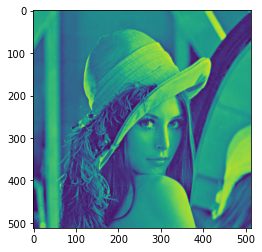

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import statistics 

im = Image.open("lena_gray.png")
data = np.asarray(im)

#SNR
#snr = SNRTeorica(data, 1, 3)
#print("SNR = {}".format(snr))

plt.imshow(im)
plt.show()
#im.show()

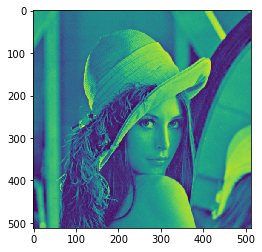

valor medio da SNRt 48.43066345162798
valor medio da SNRp 47.469160153847156
valor medio da SNRp final 45.51758332837022


In [20]:
''' Quantificar Sinal --> Codificar Sinal --> Hamming --> Correção de erros --> Descodificar Sinal '''


data = np.asarray(im)
Vmaxs = []
for i in range(len(data)):
    Vmax = np.max(data[i])
    Vmaxs.append(Vmax)
Vmax_definido = max(Vmaxs) + 1

R = 8
m = 0

sended_data = []
SNRt = []
SNRp = []
SNRpd = []

modulador = PSKModulador()
canal = AWGNChannel()
quantificador = UniformQuantizer(R, Vmax, "midrise")
codificador = Codificador()

for i in range(len(data)):
    
    Vmax = np.max(data[i])
    
    Vq,Iq = quantificador.Quantific(R, Vmax_definido,"midrise")
    
    imagem_quantificada = quantificador.Quantificador(data[i],Vq,Iq)
        
    SNRt.append(Measure_SNRt(R, Vmax, data[i]))
    SNRp.append(Measure_SNRp(data[i], imagem_quantificada))
    
    imagem_codificada = codificador.Codific(imagem_quantificada,8)
    
    #print(imagem_codificada)
    
    imagem_hamming = Hamming_7_4(imagem_codificada)
    
    #print(imagem_hamming)
    
    imagem_corrigida = Detetor(imagem_hamming)
    
    imagem_descodificada = codificador.Descodific(imagem_corrigida,8)
    
    SNRpd.append(Measure_SNRp(data[i], imagem_descodificada))
    
    sended_data.append(imagem_descodificada)
    
plt.imshow(sended_data, interpolation='nearest')
plt.show()
    
print("valor medio da SNRt {}".format(statistics.median(SNRt)))

print("valor medio da SNRp {}".format(statistics.median(SNRp)))
  
print("valor medio da SNRp final {}".format(statistics.median(SNRpd)))

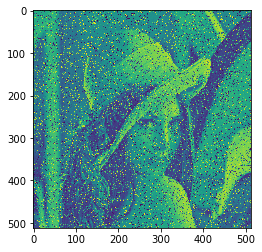

Ber Antes 0.10016741071428571
Ber Depois 0.499267578125


In [21]:
''' Quantificar Sinal --> Codificar Sinal --> Hamming --> Erros--> Correção de erros --> Descodificar Sinal '''

data = np.asarray(im)
Vmaxs = []
for i in range(len(data)):
    Vmax = np.max(data[i])
    Vmaxs.append(Vmax)
Vmax_definido = max(Vmaxs) + 1

sended_data = []
a = []
b = []
SNRt = []
SNRp = []
SNRpd = []

for i in range(len(data)):
    
    Vmax = np.max(data[i])
    
    Vq,Iq = quantificador.Quantific(R, Vmax_definido,"midtread")
    
    imagem_quantificada = quantificador.Quantificador(data[i],Vq,Iq)
        
    SNRt.append(Measure_SNRt(R, Vmax, data[i]))
    SNRp.append(Measure_SNRp(data[i], imagem_quantificada))
    
    sinal_codificado = codificador.Codific(imagem_quantificada,8)
    
    imagem_hamming = Hamming_7_4(sinal_codificado)
    
    BERt = 0.1
    y = 1 * np.logical_xor( imagem_hamming, np.random.binomial( 1, BERt, len(imagem_hamming) ))
    
    imagem_corrigida = Detetor(y)
        
    imagem_descodificada = codificador.Descodific(imagem_corrigida,8)
    
    ber_antes = ber_pratico(imagem_hamming,y)
    
    ber_depois = BER_pratico(imagem_hamming,imagem_corrigida)
    
    SNRpd.append(Measure_SNRp(data[i], imagem_descodificada))
    
    a.append(ber_antes)
    b.append(ber_depois)
    sended_data.append(imagem_descodificada)

        
plt.imshow(sended_data, interpolation='nearest')
plt.show()
    
print("Ber Antes {}".format(statistics.median(a)))
print("Ber Depois {}".format(statistics.median(b)))

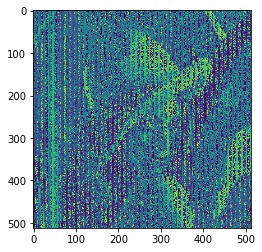

Ber teorico 0.3307582122228423
Ber pratico no Recetor 0.351806640625
SNR no Emissor 5.248786029257648
SNR no Recetor 5.29310026446081


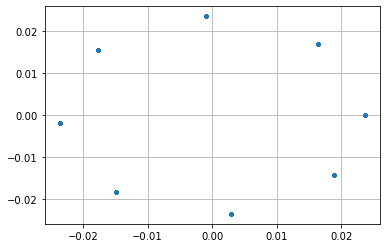

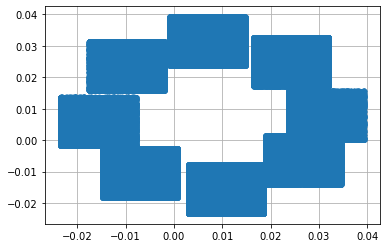

In [26]:
'''Quantificar Sinal --> Codificar Sinal -->Modulação --> Desmodulação Hamming --> Erros--> Correção de erros --> 
    Descodificar Sinal'''

data = np.asarray(im)
Vmaxs = []
for i in range(len(data)):
    Vmax = np.max(data[i])
    Vmaxs.append(Vmax)
Vmax_definido = max(Vmaxs) + 1

sended_data = []
psk_values = []
awgn_values = []

SNR_canal = []
SNR_emissor = []
Ber_p = []
Ber_t = []

for i in range(len(data)):
    
    Vmax = np.max(data[i])
    Vq,Iq = quantificador.Quantific(R, Vmax_definido,"midtread")
    imagem_quantificada = quantificador.Quantificador(data[i],Vq,Iq)
       
    imagem_codificada = codificador.Codific(imagem_quantificada,8)
    
    imagem_corrigida = Hamming_7_4(imagem_codificada)
    
    imagem_modulada = modulador.MPSK(imagem_corrigida,7,Eb)
    
    potencia = 0.0005
    
    imagem_com_noise = canal.canalAWGN(imagem_modulada, potencia)
     
    imagem_desmodulada =  modulador.desmodulador(imagem_com_noise,7,Eb)
        
    detetor = Detetor(imagem_desmodulada)
        
    imagem_descodificada = codificador.Descodific(detetor,8)

    Ber_t.append(BER_teorico(potencia,4,8))
    
    sended_data.append(imagem_descodificada)
    SNR_canal.append(Measure_SNRp(imagem_modulada,imagem_com_noise))
    SNR_emissor.append(Measure_SNRp(imagem_quantificada,imagem_descodificada))
    psk_values.append(imagem_modulada)
    awgn_values.append(imagem_com_noise)
    Ber_p.append(BER_pratico(imagem_codificada,detetor)) 

#plt.gray()
plt.imshow(sended_data, interpolation='nearest')
plt.show()

print("Ber teorico {}".format(statistics.median(Ber_t)))
print("Ber pratico no Recetor {}".format(statistics.median(Ber_p)))
print("SNR no Emissor {}".format(statistics.median(SNR_canal)))
print("SNR no Recetor {}".format(statistics.median(SNR_emissor)))

constelacao_antes = []
constelacao_depois = []
for i in range(len(psk_values)):
    for j in range(len(psk_values[i])):
        constelacao_antes.append(psk_values[i][j])
plt.plot(np.real(constelacao_antes), np.imag(constelacao_antes), '.')
plt.grid(True)
plt.show()  

for i in range(len(awgn_values)):
    for j in range(len(awgn_values[i])):
        constelacao_depois.append(awgn_values[i][j])
        
plt.plot(np.real(constelacao_depois), np.imag(constelacao_depois), '.')
plt.grid(True)
plt.show()